# Projet Numérique: Câble sous-marin 
Mahé Maxence
Belamri Pierre

## Questions Théoriques



1) Le théorème du cours permettant d'estimer l'espérance conditionnelle par la moyenne empirique de simulation conditionnelles est la loi des grands nombres faible : $$ {\displaystyle  \lim _{n\to +\infty }\mathbf {P} \left(\left|{\overline {X}}_{n}-\mu \right|>\varepsilon \right)=0} $$

2) Afin d'obtenir la loi conditionnelle, référons nous à la partie du cours de Probabilité IV sur les vecteurs Gaussien. Appelons $ Y=(Z(x_{0} ), ..., Z(x_{k-1})) $ représentant l'ensemble des points dont on ne connait pas la profondeur et $ Z = (Z(x_{k} ), Z(x_{2})...,Z(x_{N}) ) $ qui représente la liste de points dont on a mesuré la profondeur. Le vecteur initial permettant la construction est un vecteur Gaussien, or un vecteur Gaussien étant une combinaison linéaire de variable gaussienne, le réarrangement reste Gaussien, on peut donc affirmer que le vecteur $ X=(Y, Z) $ est aussi Gaussien. On peut alors appliquer la preuve de la page 12-13 qui nous donne l'expression de la densité de $ Y $ sachant $ Z=z $ qui est $$ \frac{1}{(2 \pi) ^{k/2}    \sqrt{     \det ( CS_{Y} )     }    } \exp \left(     - \frac{1}{2}  (y - \psi (z)) ^{t} CS_{Y}  ^{-1} (y- \psi (z))                                                                                                       \right) $$

$$ avec ~~~ \psi (z) = m_{Y} - C_{Y,Z} C_{Z } ^{-1} (z-m_{Z} )$$

Il reste à expliciter les paramètres. Tout d'abord $ m_{Z} $ et $ m_{Y} $ valent toutes les deux $ \mu $ d'après l'énoncé.
La matrice de covariance de $ X $ est en fait une matrice par bloc $ \begin{pmatrix} C_{Y} & C_{Y,Z} \\ C_{Z,Y} & C_{Z} \end{pmatrix} $. 


3) Avec $  Z=m+RY $ on a $ E(Z)=( \mu, \mu , ..., \mu ) $ et $ V(Z)=( \sum_{i=1}^{n} \left( R_{1,i} \right) ^{2}, ..., \sum_{i=1}^{n} \left( R_{n,i} \right) ^{2} ) $

4) Il existe un module Python permettant de générer un vecteur Gaussien dont les composantes sont indépentantes, d'espérance nulle et de variance égale à 1. En utilisant ce module on peut construire $Z$ avec $Z=m+RY$, $m$ étant choisie il suffit de construire R tel que $^{t}RR=C_{Z}$. 

## Questions


1)

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import product

A=0
B=500
N=101
Delta= (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes * Delta



mu = -5
a = 50
sigma2 = 12


observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


#Fonction C

def C(t,a,sigma2):
    return sigma2*math.exp(-abs(t)/a)

#Question 1

def cov(D, a, sigma2) :
    return sigma2 * np.exp(-np.abs(D)/a)

2)

In [86]:
l= len(observation_indexes)
D= np.zeros((N,N),float)
for i,j in product(range(N),range(N)):
    Dij = (B-A)/(N-1) * abs(i-j)
    D[i,j] = Dij


#D est la matrice de distance
print(D)

[[   0.    5.   10. ...,  490.  495.  500.]
 [   5.    0.    5. ...,  485.  490.  495.]
 [  10.    5.    0. ...,  480.  485.  490.]
 ..., 
 [ 490.  485.  480. ...,    0.    5.   10.]
 [ 495.  490.  485. ...,    5.    0.    5.]
 [ 500.  495.  490. ...,   10.    5.    0.]]


3)

In [87]:
#SIGMA = np.zeros((N,N),float) #SIGMA est la matrice de covariance de Z 
SIGMA = cov(D, a, sigma2)

print(SIGMA)

[[  1.20000000e+01   1.08580490e+01   9.82476904e+00 ...,   6.65419193e-04
    6.02096185e-04   5.44799157e-04]
 [  1.08580490e+01   1.20000000e+01   1.08580490e+01 ...,   7.35401941e-04
    6.65419193e-04   6.02096185e-04]
 [  9.82476904e+00   1.08580490e+01   1.20000000e+01 ...,   8.12744838e-04
    7.35401941e-04   6.65419193e-04]
 ..., 
 [  6.65419193e-04   7.35401941e-04   8.12744838e-04 ...,   1.20000000e+01
    1.08580490e+01   9.82476904e+00]
 [  6.02096185e-04   6.65419193e-04   7.35401941e-04 ...,   1.08580490e+01
    1.20000000e+01   1.08580490e+01]
 [  5.44799157e-04   6.02096185e-04   6.65419193e-04 ...,   9.82476904e+00
    1.08580490e+01   1.20000000e+01]]


4)

In [88]:
#Calcul de SIGMA_OBSERVATION , la matrice de covariance entre les observations 


SIGMA_OBSERVATION = np.array([[ SIGMA[i][j] for j in observation_indexes] for i in observation_indexes])


print(SIGMA_OBSERVATION)

[[  1.20000000e+01   1.62402340e+00   2.19787667e-01   2.97450261e-02
    4.02555153e-03   5.44799157e-04]
 [  1.62402340e+00   1.20000000e+01   1.62402340e+00   2.19787667e-01
    2.97450261e-02   4.02555153e-03]
 [  2.19787667e-01   1.62402340e+00   1.20000000e+01   1.62402340e+00
    2.19787667e-01   2.97450261e-02]
 [  2.97450261e-02   2.19787667e-01   1.62402340e+00   1.20000000e+01
    1.62402340e+00   2.19787667e-01]
 [  4.02555153e-03   2.97450261e-02   2.19787667e-01   1.62402340e+00
    1.20000000e+01   1.62402340e+00]
 [  5.44799157e-04   4.02555153e-03   2.97450261e-02   2.19787667e-01
    1.62402340e+00   1.20000000e+01]]


In [89]:
unknown = np.array(unknown_indexes) * Delta

#Calcul de SIGMA_OI , la matrice de covariance entre les observations et les inconnues 

SIGMA_OI = np.array([[ SIGMA[i][j] for i in observation_indexes] for j in unknown_indexes])
print(SIGMA_OI)

[[  1.08580490e+01   1.79482343e+00   2.42902937e-01   3.28733378e-02
    4.44892249e-03   6.02096185e-04]
 [  9.82476904e+00   1.98358666e+00   2.68449262e-01   3.63306569e-02
    4.91681975e-03   6.65419193e-04]
 [  8.88981865e+00   2.19220229e+00   2.96682318e-01   4.01515855e-02
    5.43392619e-03   7.35401941e-04]
 [  8.04384055e+00   2.42275822e+00   3.27884669e-01   4.43743646e-02
    6.00541720e-03   8.12744838e-04]
 [  7.27836792e+00   2.67756192e+00   3.62368601e-01   4.90412573e-02
    6.63701244e-03   8.98221959e-04]
 [  6.58573963e+00   2.95916357e+00   4.00479240e-01   5.41989713e-02
    7.33503313e-03   9.92688787e-04]
 [  5.95902365e+00   3.27038152e+00   4.42598009e-01   5.98991269e-02
    8.10646530e-03   1.09709078e-03]
 [  5.39194757e+00   3.61433054e+00   4.89146448e-01   6.61987730e-02
    8.95902970e-03   1.21247282e-03]
 [  4.87883592e+00   3.99445300e+00   5.40590429e-01   7.31609588e-02
    9.90125908e-03   1.33998970e-03]
 [  4.41455329e+00   4.41455329e+00  

In [90]:
#Calcul de SIGMA_INCONNUES , la matrice de covariance entre les inconnues 

SIGMA_INCONNUES = np.array([[ SIGMA[i][j] for j in unknown_indexes] for i in unknown_indexes])
print (SIGMA_INCONNUES)

[[  1.20000000e+01   1.08580490e+01   9.82476904e+00 ...,   8.12744838e-04
    7.35401941e-04   6.65419193e-04]
 [  1.08580490e+01   1.20000000e+01   1.08580490e+01 ...,   8.98221959e-04
    8.12744838e-04   7.35401941e-04]
 [  9.82476904e+00   1.08580490e+01   1.20000000e+01 ...,   9.92688787e-04
    8.98221959e-04   8.12744838e-04]
 ..., 
 [  8.12744838e-04   8.98221959e-04   9.92688787e-04 ...,   1.20000000e+01
    1.08580490e+01   9.82476904e+00]
 [  7.35401941e-04   8.12744838e-04   8.98221959e-04 ...,   1.08580490e+01
    1.20000000e+01   1.08580490e+01]
 [  6.65419193e-04   7.35401941e-04   8.12744838e-04 ...,   9.82476904e+00
    1.08580490e+01   1.20000000e+01]]


5)

In [91]:
SIGMA_OBSERVATION_INVERSE = np.linalg.inv(SIGMA_OBSERVATION) #On inverse la matrice de covariance entre les observations
m_Y = [mu for i in range (len(observation_indexes))]
m_Z = [mu for i in range (len(unknown_indexes))]

E_COND = m_Z + np.dot(np.matmul(SIGMA_OI ,(SIGMA_OBSERVATION_INVERSE)),(depth - m_Y))


6)

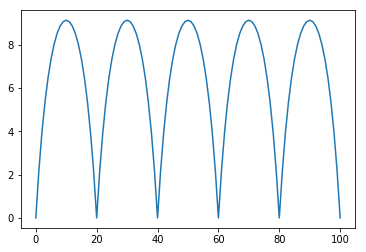

In [92]:
CS_z = SIGMA_INCONNUES - np.matmul(np.matmul(SIGMA_OI,(SIGMA_OBSERVATION_INVERSE)),(SIGMA_OI.T))
diagonale = [CS_z[i][i] for i in range(95)]

V_COND = [(0 if i%20 == 0 else diagonale[i - (i//20 + 1)]) for i in range (N)] # On rajoute la variance conditionnelle des points qui sont connus (tous les n20)
indexes = [i for i in range (N)]

plt.plot(indexes, V_COND)
plt.show()

La variance tend bien vers 0 autour des points connus, mais si l'on s'en éloigne, la profondeur devient en effet de moins en moins connue.

7)

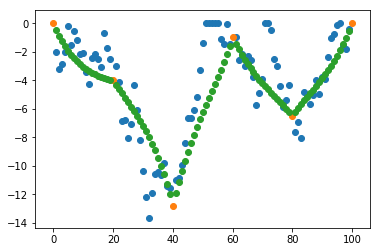

In [93]:

R = np.linalg.cholesky(CS_z)


Y = np.zeros(95)
Y_2 = np.zeros(95)
for i in range(95) :
    U = np.random.uniform()
    V = np.random.uniform()
    Y[i] = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V) #Box-Muller pour avoir un vecteur Gaussien
    Y_2[i] = np.random.randn(1)


Z = E_COND + R.dot(Y_2)    
for k in range(len(Z)) :
    if Z[k]>0:
        Z[k]=0

plt.scatter(unknown_indexes, Z)
plt.scatter(observation_indexes, depth)
plt.scatter(unknown_indexes, E_COND)
plt.show()

8)

In [94]:
def longueur(profondeur,pas):
    L=0
    l=len(profondeur)
    for i in range(1,l):
        L+=  np.sqrt( pas**2 + (profondeur[i]-profondeur[i-1])**2 ) 
    return L


9)

In [111]:
def Complete(Z) : #Complete un vecteur simulé avec les points déjà connus
    return [(depth[i//20] if i%20 == 0 else Z[i - (i//20 + 1)]) for i in range (N)]

def L_simulée(n) :
    L = []
    V=[]
    for k in range(n) :
        Z = simulation()
        L.append(longueur(Complete(Z), Delta))

    return L

L100 = L_simulée(100)

print(f"espérance conditionnelle estimée de la longueur: {np.round(np.average(L100), 3)}m.")


L100_2 = longueur(Complete(E_COND), Delta) 
print(f"longueur de l'espérance conditionnelle :est de {np.round_(L100_2, 3)}m.")


espérance conditionnelle estimée de la longueur: 520.1m.
longueur de l'espérance conditionnelle :est de 501.647m.


10

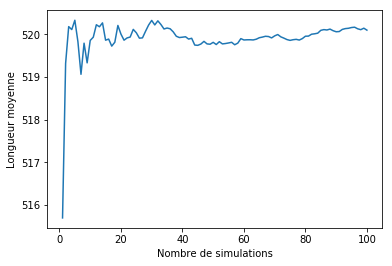

La moyenne de n longueurs simulés tend vers 520m


In [115]:

x = [k for k in range(1, len(L100)+1)]
y = [np.average(L100[:i]) for i in range(1, len(L100)+1)]
ax = plt.gca()
ax.set_xlabel("Nombre de simulations")
ax.set_ylabel("Longueur moyenne")
ax.plot(x, y)
plt.show()
print("La moyenne de n longueurs simulés tend vers 520m")


11)

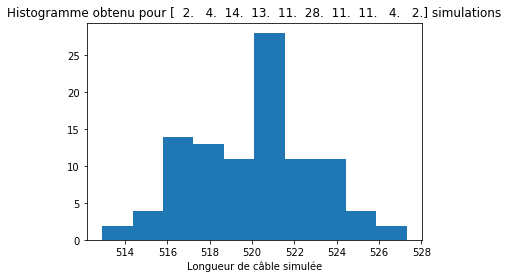

In [128]:

n = len(L100)
num_bins = min(int(np.sqrt(n)), 100)

ax = plt.gca()
n, bins, patches = ax.hist(L100, num_bins)
ax.set_xlabel("Longueur de câble simulée")
ax.set_title(f"Histogramme obtenu pour {n} simulations")
plt.show()